In [252]:
#loading library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder


In [253]:
# define column names
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

# read csv data
df = pd.read_csv('iris.csv',names=names)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


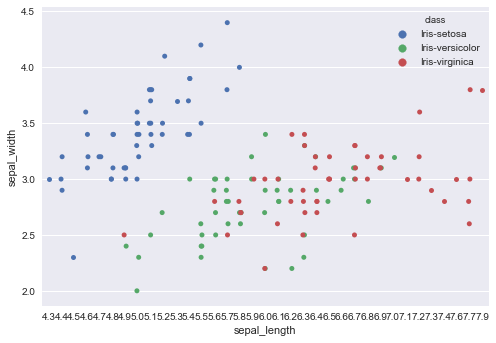

In [254]:
# Striplot - Also a scatter plot with jitter true to get overlap values 
sns.stripplot(x="sepal_length",y="sepal_width",hue="class",data=df,jitter=True)
sns.plt.show()

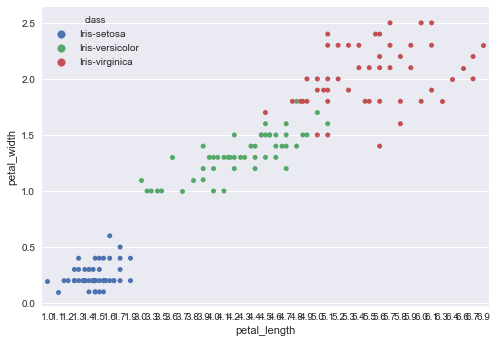

In [255]:
# Also a scatterplot to get distribution of data 

sns.swarmplot(x="petal_length",y="petal_width",hue="class",data=df)
sns.plt.show()

In [256]:
# split feature matr
X = np.array(df.iloc[:,0:4])

print("Shape of X:"+str(X.shape))

Shape of X:(150, 4)


In [227]:
enc = LabelEncoder()
y = np.transpose(enc.fit_transform(df['class']))
y.shape

(150,)

In [228]:
# split training and test set 

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.33,random_state=42)
print("Shape of X_Train:"+str(X_train.shape))
print("Shape of y_Train:"+str(y_train.shape))
print("Shape of X_Test:"+str(X_test.shape))
print("Shape of y_Test:"+str(y_test.shape))

Shape of X_Train:(100, 4)
Shape of y_Train:(100,)
Shape of X_Test:(50, 4)
Shape of y_Test:(50,)


In [229]:
# selecting learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=3)

In [230]:
#fit the model 
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [251]:
pred = knn.predict(X_test)
pred.shape

(50,)

In [245]:
knn.score(X_test,y_test)
y.shape

(150,)

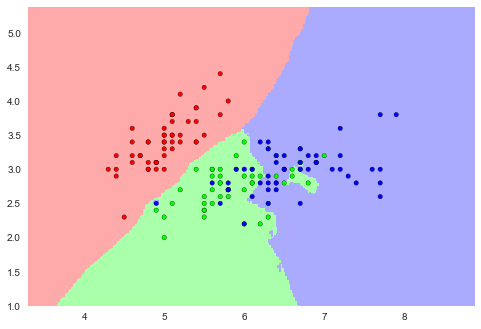

In [242]:
X = np.array(df.iloc[:, 0:2])
X.shape

plt.figure()
plt.pcolormesh(xx, yy,Z,cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1],c=y,cmap=cmap_bold,
                edgecolor='k',s=20)
plt.show()


In [249]:
n_neighbors = 15

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
#X = np.array(df.iloc[:,:2])

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = np.array(df.iloc[:, 0:2])   # convert data to array !! 

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
c = np.c_[xx.ravel(), yy.ravel()]
c.shape

(61600, 2)

In [244]:
yy.shape

(220, 280)

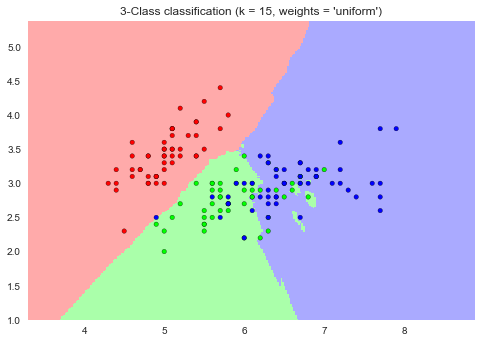

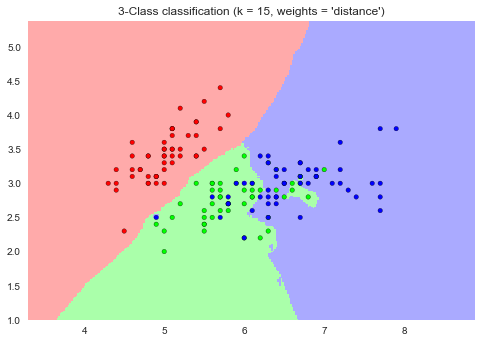

In [250]:
h = .02  # step size in the mesh

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])   # ravel to flatten the into 1D and c_ to concatenate 

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()